<a href="https://colab.research.google.com/github/Tanveer132/Neural-Network/blob/main/FST_Practice_RNN_on_loan_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Loan prediction using RNN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as  sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from keras.models import Sequential
from keras.layers import Dense

In [2]:
df=pd.read_csv('/content/loan_data_set.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df=df.iloc[:,1:]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [4]:
df.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

##data preprocessing

Fill NaN values

In [5]:
#catagorised data, better to go with mode value
df['Gender']=df['Gender'].fillna(df['Gender'].mode())
df["Married"]=df["Married"].fillna(df["Married"].mode())
#from graph--costomers with 1 deoendent is having greater chance to get loan
df["Dependents"]=df["Dependents"].fillna('0')
df["Self_Employed"]=df["Self_Employed"].fillna(df["Self_Employed"].mode())


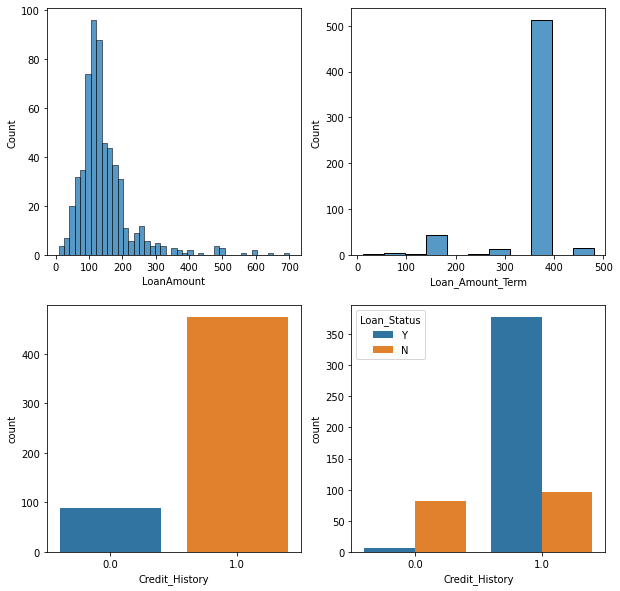

In [6]:
#Filling numerical data
#plot graph to check dispersion

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.histplot(data=df,x="LoanAmount")

plt.subplot(2,2,2)
sns.histplot(data=df,x="Loan_Amount_Term")

plt.subplot(2,2,3)
sns.countplot(data=df,x="Credit_History")

plt.subplot(2,2,4)
sns.countplot(data=df,x="Credit_History",hue="Loan_Status")  

In [7]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].median())
df.isna().sum()

Gender               13
Married               3
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

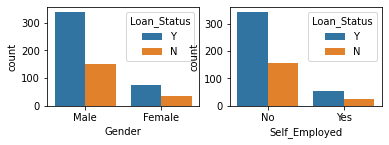

In [8]:
plt.subplot(2,2,1)
sns.countplot(data=df,x="Gender",hue="Loan_Status")

plt.subplot(2,2,2)
sns.countplot(data=df,x="Self_Employed",hue="Loan_Status")

In [9]:
df['Gender']=df['Gender'].fillna("Male")
df["Self_Employed"]=df["Self_Employed"].fillna("No")
df.isna().sum()

Gender               0
Married              3
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [10]:
df["Married"]=df["Married"].fillna('Yes')
df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Encoding Values

In [11]:
df["Gender"]=df["Gender"].astype(str)
df["Married"]=df["Married"].astype(str)
df["Dependents"]=df["Dependents"].astype(str)
df["Education"]=df["Education"].astype(str)
df["Self_Employed"]=df["Self_Employed"].astype(str)
df["Property_Area"]=df["Property_Area"].astype(str)
df["Loan_Status"]=df["Loan_Status"].astype(str)

encoder=LabelEncoder()
encoder.fit(df["Gender"])
df["Gender"]=encoder.transform(df["Gender"])

encoder.fit(df["Married"])
df["Married"]=encoder.transform(df["Married"])

encoder.fit(df["Dependents"])
df["Dependents"]=encoder.transform(df["Dependents"])

encoder.fit(df["Education"])
df["Education"]=encoder.transform(df["Education"])

encoder.fit(df["Self_Employed"])
df["Self_Employed"]=encoder.transform(df["Self_Employed"])

encoder.fit(df["Property_Area"])
df["Property_Area"]=encoder.transform(df["Property_Area"])

encoder.fit(df["Loan_Status"])
df["Loan_Status"]=encoder.transform(df["Loan_Status"])


In [12]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [13]:
df.shape

(614, 12)

In [14]:
x=df.iloc[:,:-1]
#x=df.drop(columns=["Outcome"])
y=df.iloc[:,-1]

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

##Fit model

In [15]:

model=Sequential()
#3 layers , dimensions = 11 <--feature columns
model.add(Dense(12,activation="relu",input_dim=11))
model.add(Dense(10,activation="relu"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                144       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                130       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 285
Trainable params: 285
Non-trainable params: 0
_________________________________________________________________


In [16]:
#binary entropy hinge, squared hinge loss, optimizer reduces loss
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=['accuracy'])

In [17]:
# epochs 50----->each batch will pass 50 times
#batch 10
history=model.fit(xtrain,ytrain,epochs=50,batch_size=10)

Epoch 1/50
50/50 [==============================] - 1s 1ms/step - loss: 181.1924 - accuracy: 0.4741
Epoch 2/50
50/50 [==============================] - 0s 1ms/step - loss: 72.3729 - accuracy: 0.5747
Epoch 3/50
50/50 [==============================] - 0s 1ms/step - loss: 33.7980 - accuracy: 0.6371
Epoch 4/50
50/50 [==============================] - 0s 1ms/step - loss: 13.5052 - accuracy: 0.5882
Epoch 5/50
50/50 [==============================] - 0s 1ms/step - loss: 7.6590 - accuracy: 0.5107
Epoch 6/50
50/50 [==============================] - 0s 1ms/step - loss: 3.5952 - accuracy: 0.6225
Epoch 7/50
50/50 [==============================] - 0s 1ms/step - loss: 4.1448 - accuracy: 0.5365
Epoch 8/50
50/50 [==============================] - 0s 1ms/step - loss: 3.1515 - accuracy: 0.6120
Epoch 9/50
50/50 [==============================] - 0s 1ms/step - loss: 2.8717 - accuracy: 0.6107
Epoch 10/50
50/50 [==============================] - 0s 1ms/step - loss: 3.7578 - accuracy: 0.5450
Epoch 11/50
50

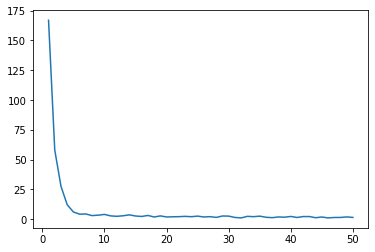

In [18]:

#plot epoch Vs Loss 
plt.plot(range(1,51),history.history["loss"])

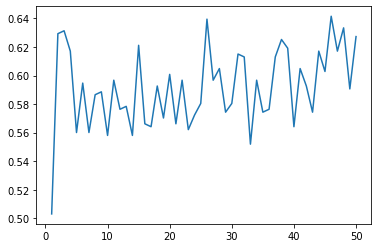

In [19]:
#plot epoch Vs Accuracy 
plt.plot(range(1,51),history.history["accuracy"])

In [20]:
ypred=model.predict_classes(xtest)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [21]:
ypred.flatten()

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [22]:
loss,acc=model.evaluate(xtrain,ytrain)

16/16 [==============================] - 0s 1ms/step - loss: 1.4747 - accuracy: 0.6864


In [23]:
loss,acc=model.evaluate(xtest,ytest)

4/4 [==============================] - 0s 3ms/step - loss: 1.1374 - accuracy: 0.6911


In [24]:
report=classification_report(ytest,ypred)
print(report)

              precision    recall  f1-score   support

           0       0.14      0.03      0.05        33
           1       0.72      0.93      0.82        90

    accuracy                           0.69       123
   macro avg       0.43      0.48      0.43       123
weighted avg       0.57      0.69      0.61       123



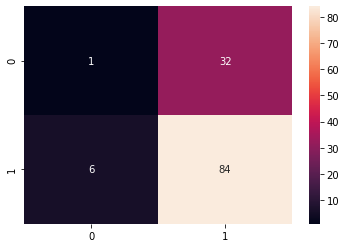

In [25]:
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


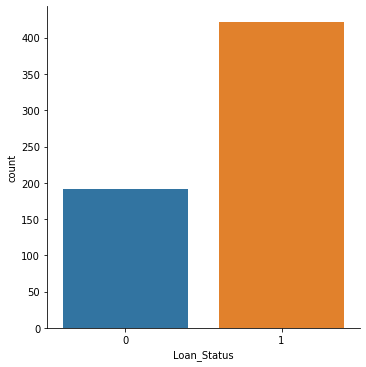

In [26]:
sns.catplot(df['Loan_Status'],data=df,kind='count')

In [27]:
#over sampling of data
no=df[df["Loan_Status"]==0].index
yes=df[df["Loan_Status"]==1].index

#random_index for fraud with majority class size
random_index=np.array(np.random.choice(no,len(yes),replace=True))

oversample_index=np.concatenate([yes,random_index])
oversample=df.loc[oversample_index,:]
x=oversample.drop(columns=["Loan_Status"])
y=oversample["Loan_Status"]
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


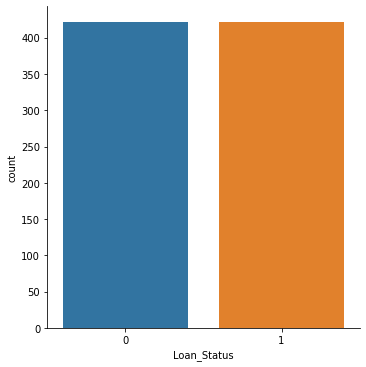

In [28]:
sns.catplot(oversample['Loan_Status'],data=oversample,kind='count')

In [29]:
history=model.fit(xtrain,ytrain,epochs=50,batch_size=10)

Epoch 1/50
68/68 [==============================] - 0s 1ms/step - loss: 1.8815 - accuracy: 0.4993
Epoch 2/50
68/68 [==============================] - 0s 1ms/step - loss: 1.9043 - accuracy: 0.5422
Epoch 3/50
68/68 [==============================] - 0s 1ms/step - loss: 1.2157 - accuracy: 0.5289
Epoch 4/50
68/68 [==============================] - 0s 1ms/step - loss: 1.4188 - accuracy: 0.5496
Epoch 5/50
68/68 [==============================] - 0s 1ms/step - loss: 0.9811 - accuracy: 0.4874
Epoch 6/50
68/68 [==============================] - 0s 1ms/step - loss: 1.6110 - accuracy: 0.5096
Epoch 7/50
68/68 [==============================] - 0s 1ms/step - loss: 2.3891 - accuracy: 0.5289
Epoch 8/50
68/68 [==============================] - 0s 1ms/step - loss: 2.4584 - accuracy: 0.5141
Epoch 9/50
68/68 [==============================] - 0s 1ms/step - loss: 1.6997 - accuracy: 0.5378
Epoch 10/50
68/68 [==============================] - 0s 1ms/step - loss: 1.0919 - accuracy: 0.5230
Epoch 11/50
68/68 [

In [30]:
ypred=model.predict_classes(xtest)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [31]:
loss,acc=model.evaluate(xtrain,ytrain)

22/22 [==============================] - 0s 1ms/step - loss: 2.0751 - accuracy: 0.5437


In [32]:
loss,acc=model.evaluate(xtest,ytest)

6/6 [==============================] - 0s 2ms/step - loss: 2.0876 - accuracy: 0.5089


In [33]:
report=classification_report(ytest,ypred)
print(report)

              precision    recall  f1-score   support

           0       0.52      0.62      0.57        88
           1       0.48      0.38      0.43        81

    accuracy                           0.51       169
   macro avg       0.50      0.50      0.50       169
weighted avg       0.50      0.51      0.50       169



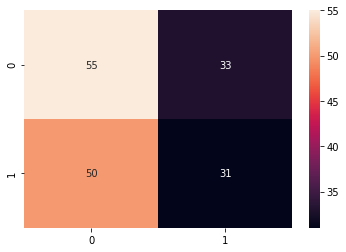

In [34]:
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)